In [43]:
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [44]:
# Importing dataset
data = pd.read_csv('coba.csv')
print(data.shape)
data.head()

(61, 2)


,x,y
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


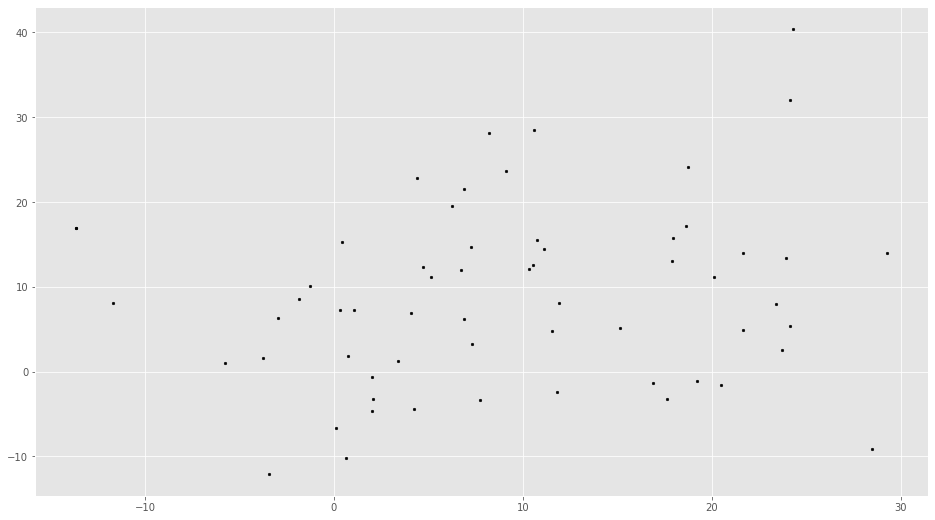

In [45]:
# Dapatkan nilai dan plotting
f1 = data['x'].values
f2 = data['y'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)

In [46]:
# Euclidean Distance kalkulator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [47]:
# jumlah cluster
k = 3
# X koordinat centroid acak
C_x = np.random.randint(0, np.max(X)-20, size=k)
# Y X koordinat centroid acak
C_y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

[[19. 12.]
 [11. 16.]
 [ 5.  7.]]


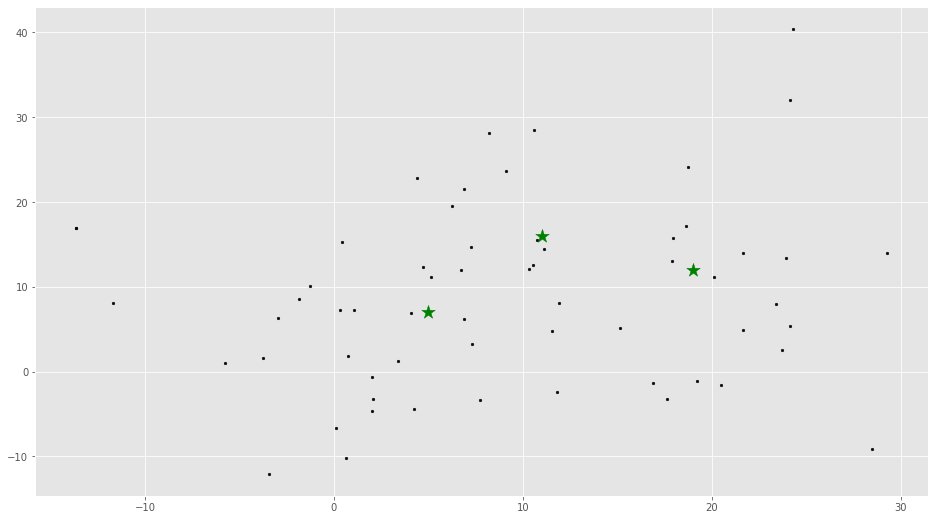

In [48]:
# Plotting Centroids
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

In [49]:
# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Fungsi error.- Jarak antara centroid baru dan centroid lama
error = dist(C, C_old, None)
# Loop akan berjalan sampai kesalahan menjadi nol
while error != 0:
    # Menetapkan setiap nilai ke kluster terdekat
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # menyompan nilai centroid lama
    C_old = deepcopy(C)
    # menemukan cetroid baru dengan nilai rata-rata
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

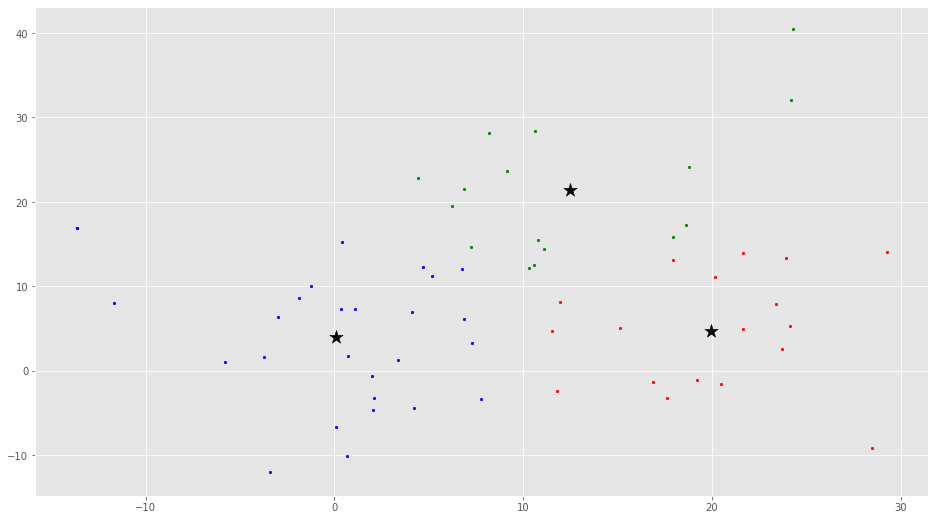

In [50]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')